In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("C:/Users/jasmine/OneDrive/Desktop/Netflix data/netflix_titles.csv")

In [2]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
dataset.shape

(8807, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
print(dataset.isnull().sum()) 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
#CLEANING THE DATA
# Dropping duplicate tuples

dataset.drop_duplicates(inplace = True)

#verfying the dataset to be clean
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
print(dataset.nunique())

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


In [11]:
# How many Movies and TV show are there?

dataset['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [12]:
#adding new functionalities

dataset['date_added'] = pd.to_datetime(dataset['date_added'], format = 'mixed')
dataset['year_added'] = dataset['date_added'].dt.year
dataset['month_added'] = dataset['date_added'].dt.month

dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


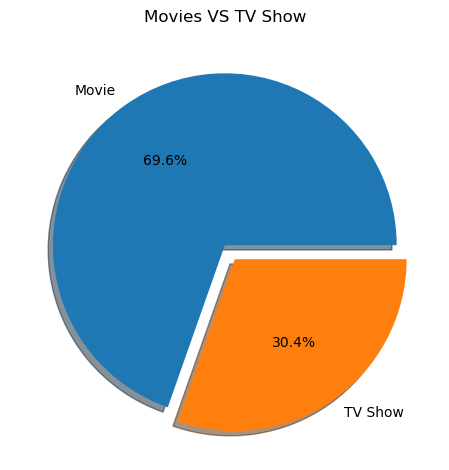

In [13]:
#Q1. How many Movies vs. TV Shows are there on Netflix?

content_type = dataset['type'].value_counts()
plt.pie(content_type, labels = content_type.index, explode = [0 , 0.1], shadow = True, autopct = "%1.1f%%")

plt.title("Movies VS TV Show")

plt.tight_layout()
plt.show()


In [34]:
#Q2. What are the most common genres?

from collections import Counter
genre_counts = Counter(genre.strip() for genres in dataset['listed_in'].dropna() for genre in genres.split(','))
genre_dataset = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
print("\nMost Common Genres:")
print(genre_dataset.head(10))


Most Common Genres:
                       Genre  Count
14      International Movies   2752
12                    Dramas   2427
16                  Comedies   1674
1     International TV Shows   1351
0              Documentaries    869
25        Action & Adventure    859
2                  TV Dramas    763
13        Independent Movies    756
11  Children & Family Movies    641
19           Romantic Movies    616


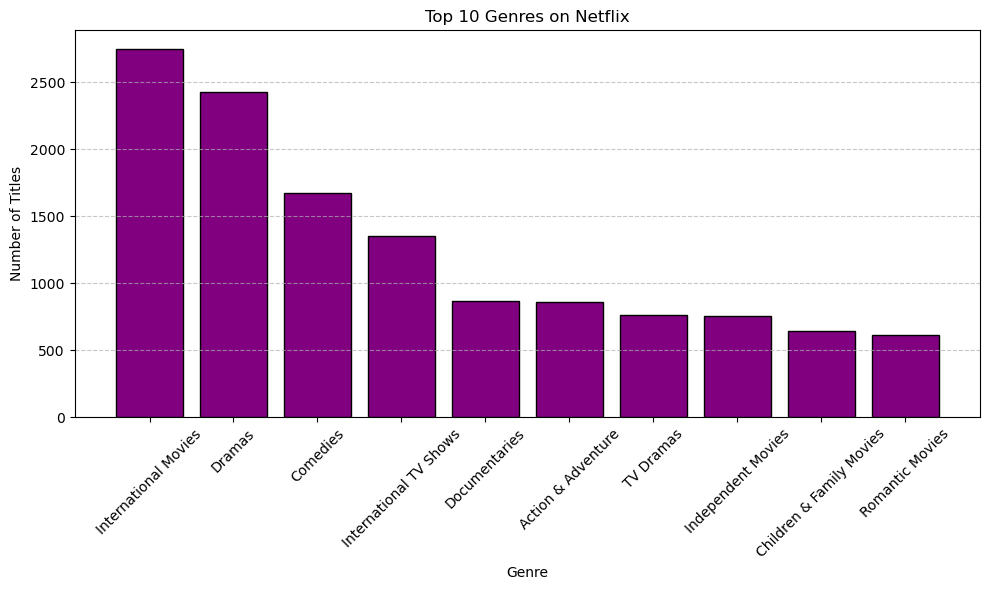

In [18]:
#Q3. Most Common Genres Visualization

from collections import Counter

# Assuming 'dataset' is already loaded as a DataFrame
# Handle missing values in 'listed_in' column
genres = list(dataset['listed_in'].dropna())

# Split genres and clean spaces
genres = [genre.strip() for sublist in genres for genre in sublist.split(',')]

genre_count = Counter(genres)

# Create DataFrame for top 10 genres
top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_genres['Genre'], top_genres['Count'], color='purple', edgecolor='black')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

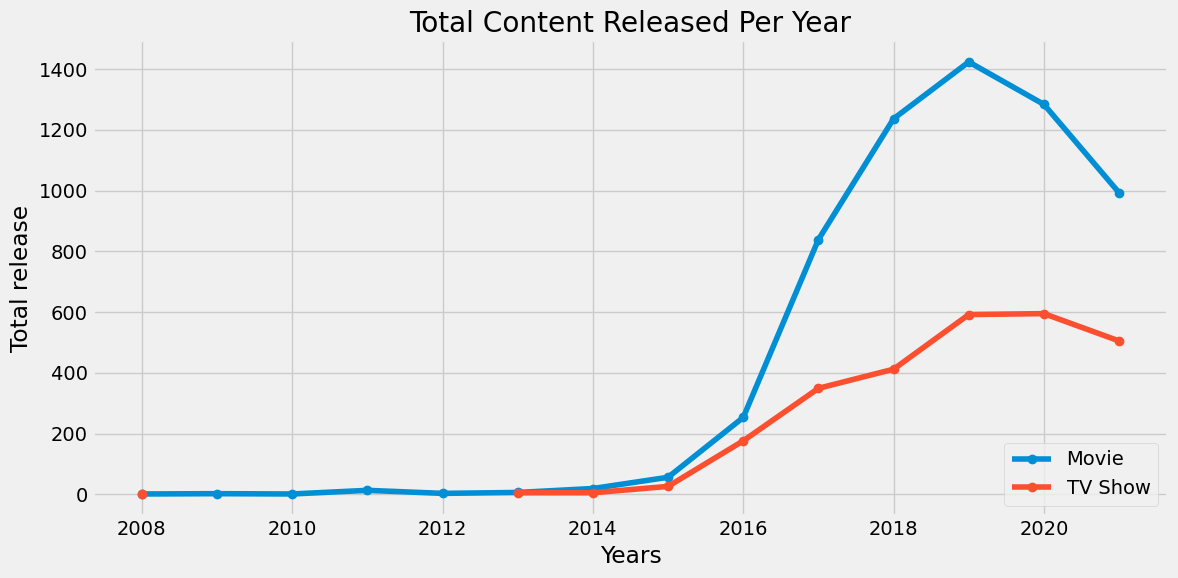

In [20]:
#Q4. Content released per year Distribution

content_trend = dataset.groupby(['year_added', 'type']).size().unstack()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

plt.plot(content_trend.index, content_trend['Movie'], marker = 'o', label = 'Movie')
plt.plot(content_trend.index, content_trend['TV Show'], marker = 'o', label = 'TV Show')  

plt.xlabel('Years')
plt.ylabel('Total release')
plt.title('Total Content Released Per Year')
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

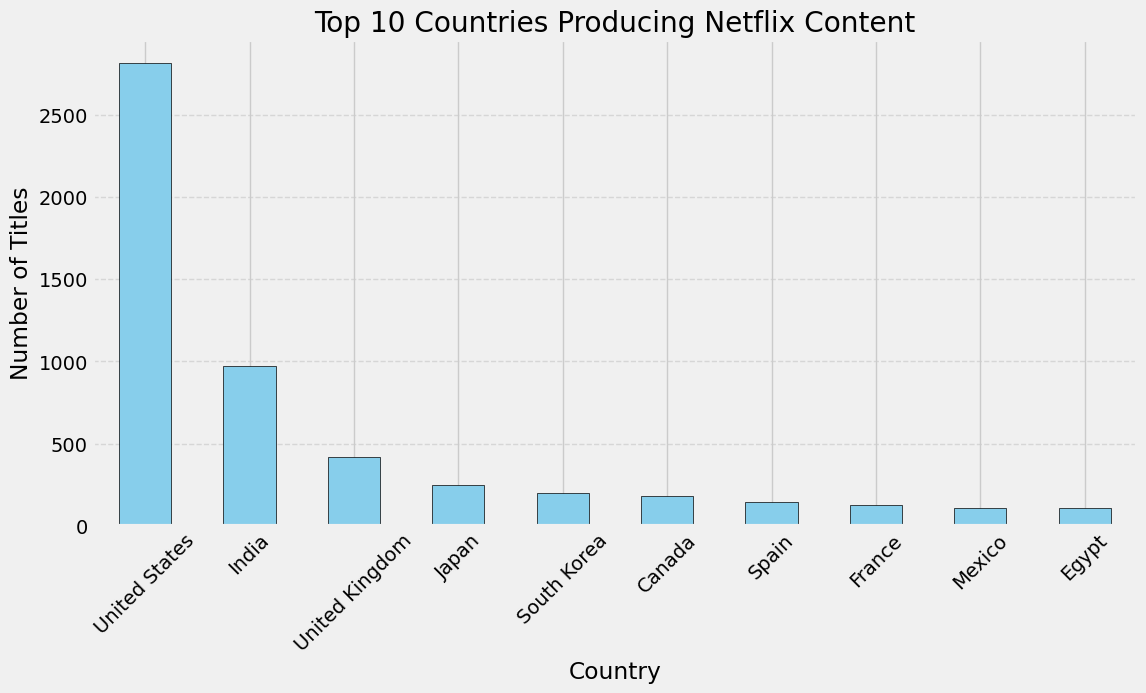


Top 10 Countries Producing Netflix Content:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [22]:
#Q5. Top 10 countries producing NETFLIX content

country_counts = dataset['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print("\nTop 10 Countries Producing Netflix Content:")
print(country_counts)

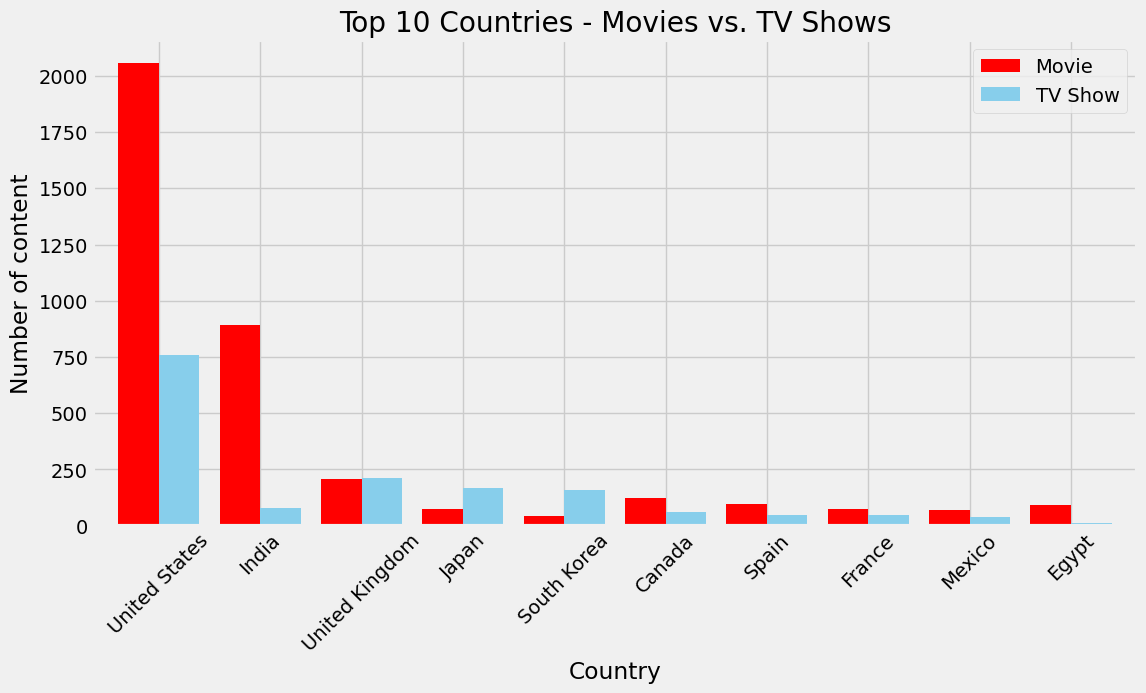

In [24]:
#Q6. What are the trends in movie vs. TV show releases?

country_content = dataset.groupby(['country', 'type']).size().unstack()

top_countries = country_content.sum(axis=1).nlargest(10).index
country_content = country_content.loc[top_countries]

country_content.plot(kind='bar', width=0.8, figsize=(12,6), color=['red', 'skyblue'])

plt.xlabel("Country")
plt.ylabel("Number of content")
plt.title("Top 10 Countries - Movies vs. TV Shows")
plt.xticks(rotation=45)
plt.legend()
plt.show()

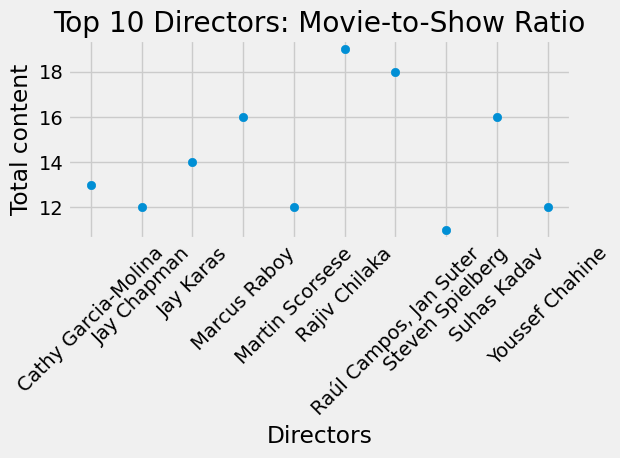

In [26]:
#Q7. Who are the most frequent directors?

top_directors = dataset.loc[dataset['director'] != "No Data", 'director'].value_counts().head(10).index

directed_content = dataset[dataset['director'].isin(top_directors)].groupby(['director', 'type']).size().unstack(fill_value = 0)
directed_content['total_content'] = directed_content.sum(axis = 1)
directed_content['movie_ratio'] = directed_content['Movie'] / directed_content['total_content']

plt.scatter(directed_content.index, directed_content['total_content'])
      
plt.xlabel('Directors')
plt.xticks(rotation=45)
plt.ylabel('Total content')
plt.title('Top 10 Directors: Movie-to-Show Ratio')

plt.tight_layout()
plt.show()

In [28]:
#Q8. Duration Analysis (For Movies & TV Shows)

dataset_movies = dataset[dataset['type'] == 'Movie'].copy()
dataset_movies['duration'] = dataset_movies['duration'].str.replace(' min', '', regex=True).astype(float)

average_duration = dataset_movies['duration'].mean()
longest_movie = dataset_movies.loc[dataset_movies['duration'].idxmax(), ['title', 'duration']]
shortest_movie = dataset_movies.loc[dataset_movies['duration'].idxmin(), ['title', 'duration']]

print(f"\nAverage Movie Duration: {average_duration:.2f} minutes")
print(f"Longest Movie: {longest_movie['title']} ({longest_movie['duration']} min)")
print(f"Shortest Movie: {shortest_movie['title']} ({shortest_movie['duration']} min)")



Average Movie Duration: 99.58 minutes
Longest Movie: Black Mirror: Bandersnatch (312.0 min)
Shortest Movie: Silent (3.0 min)


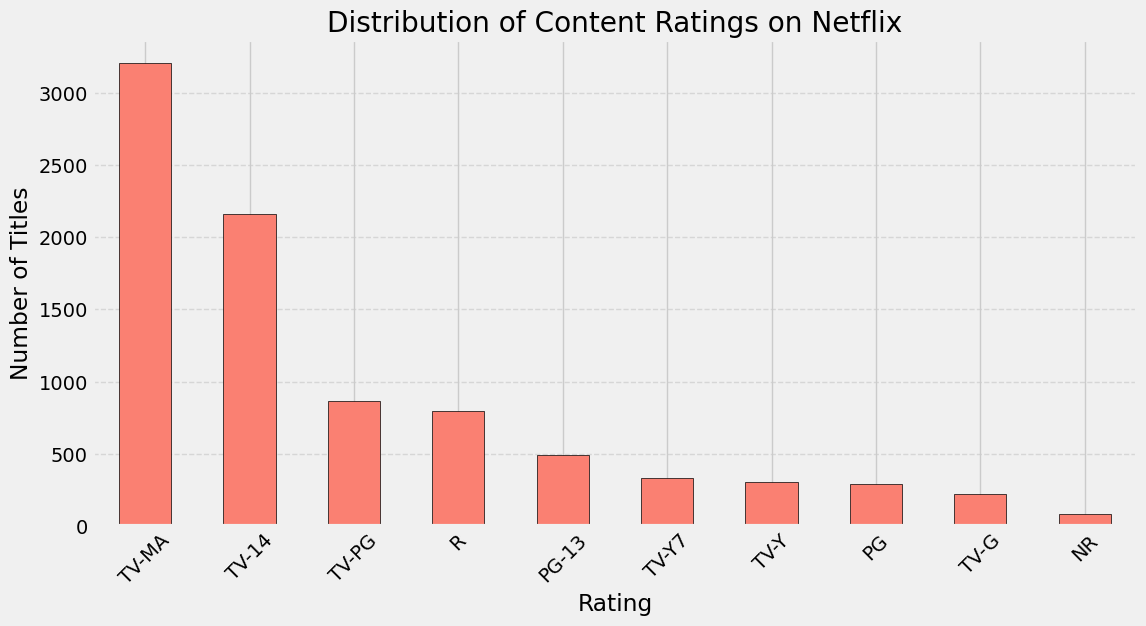


Top 10 Content Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


In [30]:
#Q9. Content Ratings Distribution
rating_counts = dataset['rating'].value_counts().head(10)
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Ratings on Netflix")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("\nTop 10 Content Ratings:")
print(rating_counts)